<a href="https://colab.research.google.com/github/nathasha-naranpanawa/COMP4702_2024/blob/main/PracW13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 - Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

## Q1

c:\Users\Krisna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


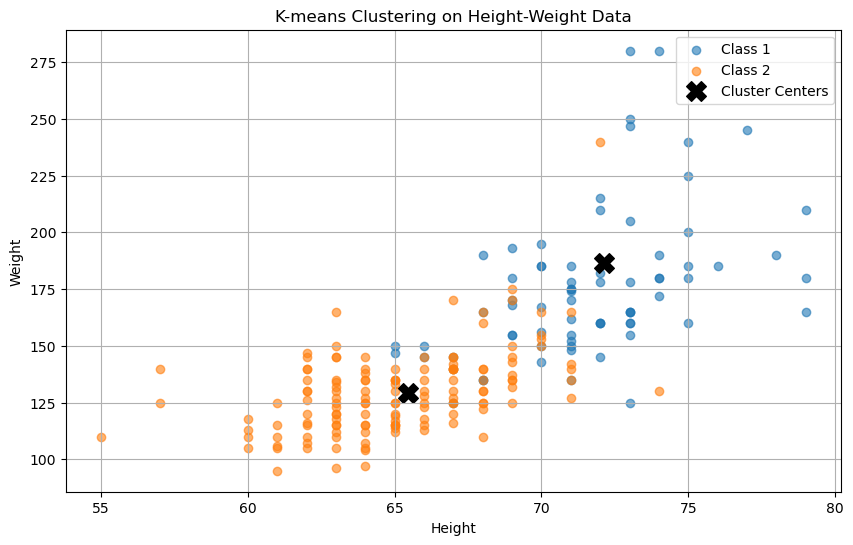

In [2]:
# Load dataset
heightWeightData = pd.read_csv('./heightWeightData.csv', header=None).to_numpy()

# TODO: Extract inputs and n_clusters
class_labels = heightWeightData[:, 0]
height_weight = heightWeightData[:, 1:3]
n_clusters = len(np.unique(class_labels))


# TODO: Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(height_weight)
cluster_centers = kmeans.cluster_centers_

# Plot the data
plt.figure(figsize=(10, 6))

# TODO: Plot data points color-coded by class label
for label in sorted(np.unique(class_labels)):
    idx = class_labels == label
    plt.scatter(height_weight[idx, 0], height_weight[idx, 1], label=f'Class {int(label)}', alpha=0.6)


# TODO: Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='X', s=200, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('K-means Clustering on Height-Weight Data')
plt.legend()
plt.grid(True)
plt.show()

## Q2

In [3]:
def pca(X, n_components):
    # Standardize data
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    
    # Handle small standard deviations to avoid division by zero
    epsilon = 1e-8
    X_std[X_std < epsilon] = epsilon  # Replace very small standard deviations with epsilon
    X_normalized = (X - X_mean) / X_std
    
    # Covariance matrix
    cov_matrix = np.cov(X_normalized, rowvar=False)
    
    # Ensure covariance matrix is symmetric (for safety)
    cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Symmetrize the matrix
    
    # Eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Ensure non-negative eigenvalues by clipping negative values
    eigenvalues = np.clip(eigenvalues, 0, None)
    
    # Sort eigenvectors by eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    
    # Select top n_components
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Project data
    X_pca = np.dot(X_normalized, selected_eigenvectors)
    
    return X_pca, selected_eigenvectors, sorted_eigenvalues

## Q3

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target.astype(int)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply custom PCA to reduce the data to 2 components
X_pca_mnist, _, eigenvalues = pca(X_scaled, 2)



## Q4

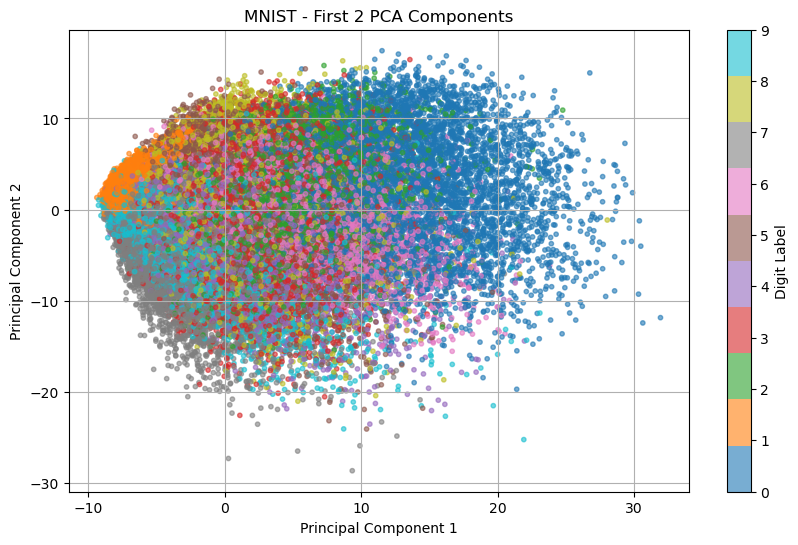

In [5]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=y, cmap='tab10', alpha=0.6, s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST - First 2 PCA Components')
plt.colorbar(scatter, label='Digit Label')
plt.grid(True)
plt.show()


## Q5

In [6]:

# Calculate explained variance ratio for each component
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate the variance explained by the first two principal components
variance_explained_ratio = np.sum(explained_variance_ratio[:2]) * 100

# Print the result
print(f"Variance explained by the first two principal components: {variance_explained_ratio:.2f}%")

Variance explained by the first two principal components: 9.68%


## Q6

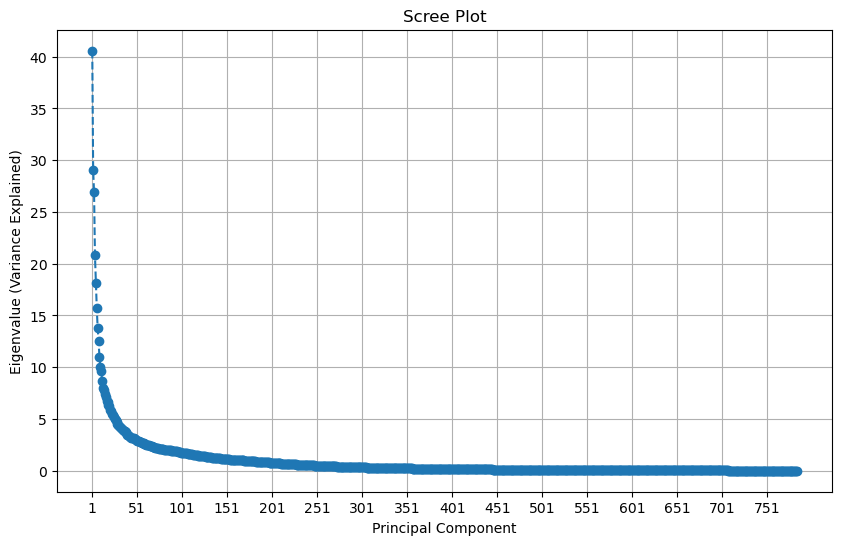

In [7]:
# TODO: Plot the Scree plot
# Plot the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.xticks(np.arange(1, len(eigenvalues) + 1, step=50))
plt.grid(True)
plt.show()

## Q7

In this question, students must apply the steps from Q2–Q6 to the '*swissroll.txt*' dataset as per guiding comments.

To download the dataset:
* Open the '*swissroll.txt*' file on Blackboard and copy the content.
* Create a new .txt file on your local computer.
* Paste the content into the newly created .txt file and save it.
* (Optional) If using Google Colab with Drive, upload the .txt file to the same folder as your notebooks (typically *Colab Notebooks* on Drive).

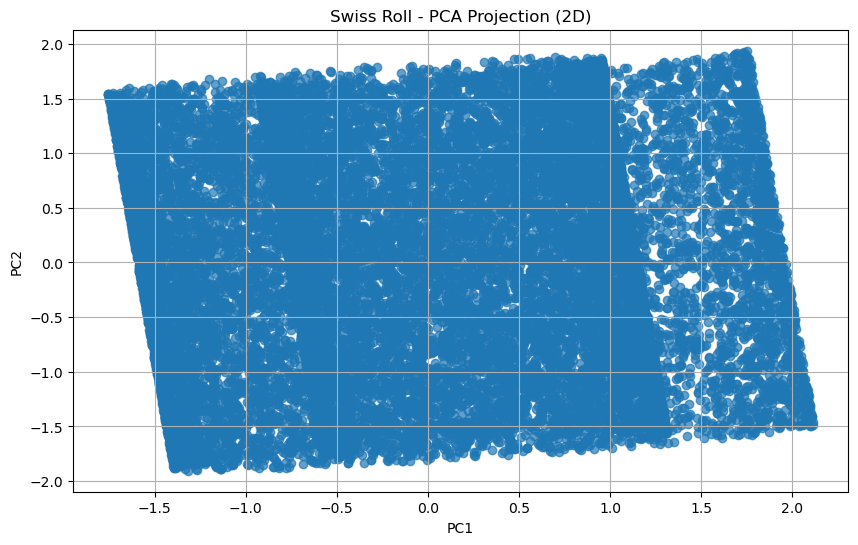

Variance explained by the first two principal components: 68.85%


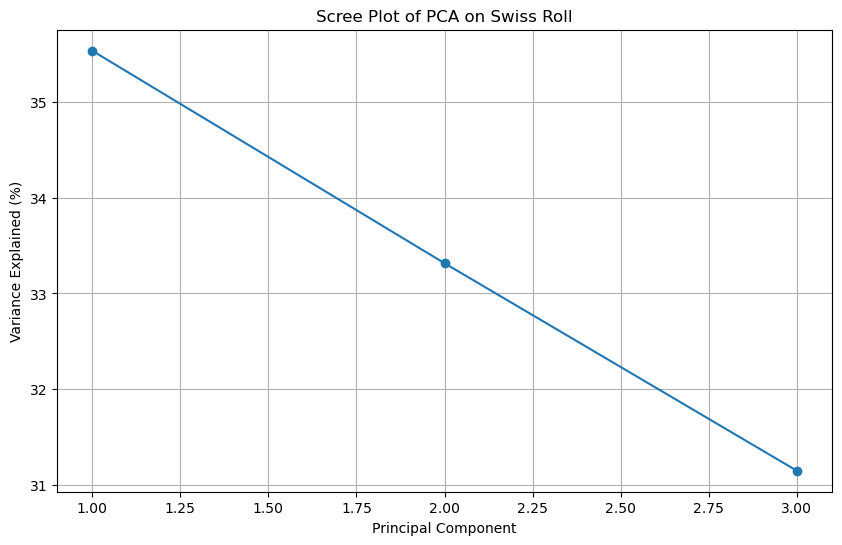

In [8]:
# Load swissroll data
X = np.loadtxt('./swissroll.txt')

# # Scale the data using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


# Apply custom PCA to reduce the data to 2 components
X_pca_mnist, _, eigenvalues = pca(X, 2)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Swiss Roll - PCA Projection (2D)')
plt.grid(True)
plt.show()

# Calculate explained variance ratio for each component
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate the variance explained by the first two principal components
variance_explained_ratio = np.sum(explained_variance_ratio[:2]) * 100

# Print the result
print(f"Variance explained by the first two principal components: {variance_explained_ratio:.2f}%")

# Plot the Scree Plot
plt.figure(figsize=(10, 6))
explained_variance_ratio_swiss = 100 * eigenvalues / np.sum(eigenvalues)
plt.plot(np.arange(1, len(eigenvalues) + 1), explained_variance_ratio_swiss, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot of PCA on Swiss Roll')
plt.grid(True)
plt.show()
